In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sunpy

import sys
sys.path.insert(0, '..')
from module import carrington, toSunpyMap

In [2]:
map = toSunpyMap('../data/carrington_test_data/imoa_06563_l1_20240306_13270563_emi1.fts.bz2')

coordinates = sunpy.map.all_coordinates_from_map(map)
coordinates = sunpy.map.all_coordinates_from_map(map)
weights = coordinates.transform_to("heliocentric").z.value

mu = np.array(weights / np.nanmax(weights))

weights = np.array(np.ones(mu.shape) - mu)


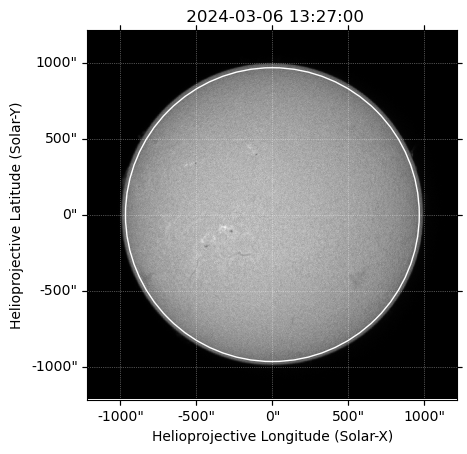

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax)
map.draw_limb(axes=ax);

# Carrington sunmap

In [8]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename, flat=True).data)

In [9]:
img = np.full(carrington_list[0].data.shape, np.nan)

img = np.nanmin(carrington_list, axis=0)

C:\Users\lherrington\AppData\Local\Temp\ipykernel_1884\3646129219.py:3: RuntimeWarning: All-NaN axis encountered
  img = np.nanmin(carrington_list, axis=0)


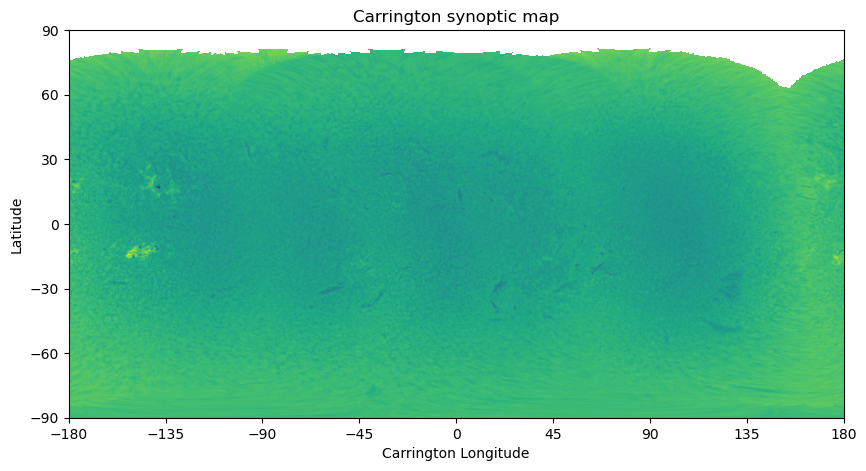

In [31]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, origin='lower', extent=[-180,180,-90,90])
 
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrington synoptic map');